<a href="https://colab.research.google.com/github/smomtahe/Cross-validated_estimator/blob/main/Cross_validated_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the lobraries
import numpy as np
import pandas as pd
import tensorflow as tf
# for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from io import StringIO
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
#libraries for analytical model
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
#libraries for selecting the best degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#klearn.datasets is used to generate synthetic datasets for regressoion
import sklearn.datasets as dt
# for generating data from a dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#import plotly_express as px
#plot surface
import os
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
from mpl_toolkits.mplot3d import Axes3D

iteration: 10000
cost: 0.05835396517190714


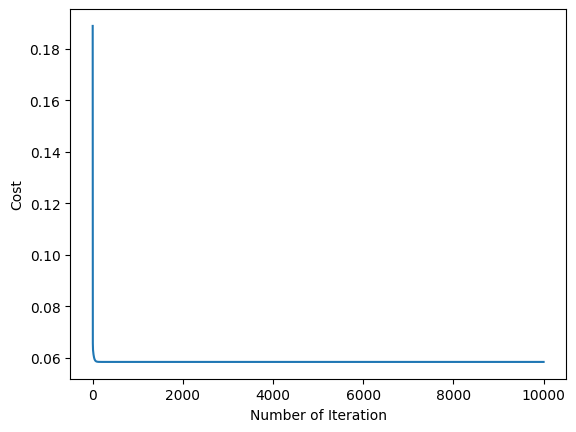

Accuracy train: 80.07%
Accuracy test: 79.57%
aa = [0.407580,0.407580,0.407616,0.407379,0.407356,0.407261,0.407202,0.407084,0.407267,0.406977,0.406894,0.406711,0.406954,0.406605,0.406463,0.406256,0.406374,0.406262,0.406102,0.405954,0.405913,0.405570,0.405665,0.405552,0.405132,0.405168,0.404943,0.404766,0.404541,0.404340,0.404110,0.404015,0.403808,0.403625,0.403329,0.403063,0.402974,0.402478,0.402200,0.401999,0.401958,0.401378,0.401218,0.400580,0.400403,0.399835,0.399900,0.399202,0.398812,0.397907,0.397659,0.397434,0.396790,0.396323,0.396086,0.395442,0.394638,0.394076,0.393325,0.392705,0.391989,0.391475,0.390623,0.389937,0.389376,0.388625,0.387626,0.386396,0.386023,0.384811,0.384096,0.383215,0.382257,0.381022,0.380087,0.378958,0.377533,0.376203,0.375245,0.373909,0.372508,0.371136,0.370018,0.367961,0.366483,0.365052,0.363592,0.361499,0.359299,0.357277,0.355397,0.353280,0.350785,0.348941,0.347185,0.344619,0.342466,0.339705,0.336524,0.334402,0.331682,0.328826,0.325864,0.322518,0.318976,0.31

In [7]:

##Implement a univariate linear regression to predict weight from height.
# Preprocessing Input data
data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/ai/main/uaa-SPLR.csv")
data.head()

X = data['intensity'].values
y = data['uaa']
X_test = data['ctr']
#print(x_data)
# Normalization
'''
x=(X-np.mean(X))/(np.std(X))
X_test=(X_test-np.mean(X_test))/(np.std(X_test))
'''
x=(X-np.min(X))/(np.max(X))
X_test=(X_test-np.min(X_test))/(np.max(X_test))

#transpose x and y
x = x.T
y = y.T
weight=[]
#initialization
def initialize(dimension):
  for  i in range(len(x)):
    weight= 0.1
  bias = 0.0
  return weight,bias

def gradient_descent(weight,bias,x,y):
    y_head = (weight*x) + bias
    loss = (y_head-y)**2
    cost = np.sum(loss) /  x.shape[0]
    derivative_weight = np.dot(x,((y_head-y).T))/ x.shape[0]
    derivative_bias = np.sum(y_head-y)/ x.shape[0]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    return cost,gradients

def update(weight,bias,x,y,learningRate,iteration):
    costList = []
    index = []
    #update weight and bias values
    for i in range(iteration):
      cost,gradients = gradient_descent(weight,bias,x,y)
      weight = weight - learningRate * gradients["Derivative Weight"]
      bias = bias - learningRate * gradients["Derivative Bias"]
      costList.append(cost)
      index.append(i)
    parameters = {"weight": weight,"bias": bias}
    print("iteration:",iteration)
    print("cost:",cost)
    return parameters, gradients

def update(weight,bias,x,y,learningRate,iteration):
    costList = []
    index = []
    #update weight and bias values
    for i in range(iteration):
      cost,gradients = gradient_descent(weight,bias,x,y)
      weight = weight - learningRate * gradients["Derivative Weight"]
      bias = bias - learningRate * gradients["Derivative Bias"]
      costList.append(cost)
      index.append(i)
    parameters = {"weight": weight,"bias": bias}
    print("iteration:",iteration)
    print("cost:",cost)
    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients

def predict(weight,bias,x):
    #weight =  weight[:, -1]
    y_prediction = (x*weight) + bias
    return y_prediction
# calling gredient descent to decrease error
def Gradient_descent(x,y,learningRate,iteration):
    dimension =  x.shape[0]
    weight,bias = initialize(dimension)
    parameters, gradients = update(weight,bias,x,y,learningRate,iteration)
    y_prediction = predict(parameters["weight"],parameters["bias"],X_test)  #test
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x) #train
    plt.show()
    print("Accuracy train: {:.2f}%".format((100 - np.mean(np.abs(y_prediction_train - y))*100)/100*100))
    print("Accuracy test: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y))*100)/100*100))
    y_prediction=y_prediction[:128]
    y_prediction = np.char.mod('%f', y_prediction)
    y_prediction = ",".join(y_prediction)
    print ("aa = [{0}];".format(y_prediction) )
Gradient_descent(x,y,0.5,10000)


0.09166739160088419
0.9999400720521747
0.10756427101053515
0.966372126351471
aa =[0.468638,-0.534017,0.031529,0.689167,0.977529,0.993056,0.470454,-5.772826,0.485097,0.654223,-0.096721,1.080671,-1.804885,0.701714,-2.731640,-0.047260,0.298513,0.832049,-2.161144,-0.396520,0.040019,-0.967216,-2.473745,0.177738,0.832343,1.219651,1.214048,0.688470,-0.488919,1.199494,0.809285,1.294097,1.381551,0.607591,0.004383,-2.631230,-5.517236,0.674990,-4.171686,0.538692,0.180987,-5.343527,1.252924,1.170879,0.829964,0.059968,0.444847,1.322627,0.300914,0.137976,0.722449,-0.388684,0.515085,0.097637,0.758584,0.617614,-3.349270,-2.105085,-1.304914,1.211082,0.490401,-2.498823,-4.173984,0.631398,1.031818,-0.380786,0.487197,-1.134063,-2.259013,-0.437271,-4.947645,0.570936,0.500074,1.087965,0.646125,0.340737,0.782804,-1.144255,-0.844897,-5.615412,0.276147,-4.363119,1.277906,-2.505396,-3.248730,-4.555290,-2.610152,0.747516,-1.256503,0.862350,1.042721,1.442823,1.300972,0.160901,-2.249323,0.706502,-0.274739,-0.29278

Text(0.5, 0, 'Polynomial Degree')

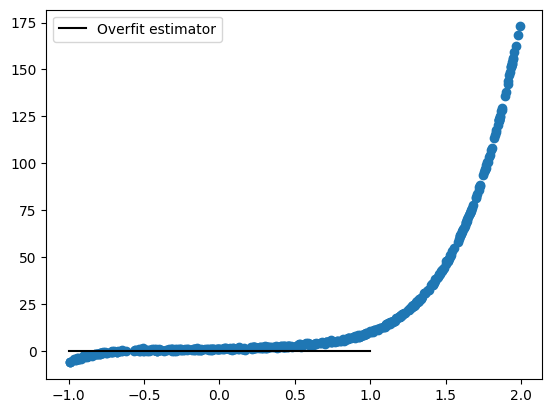

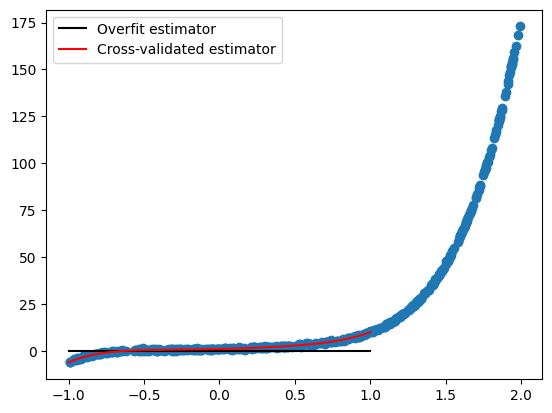

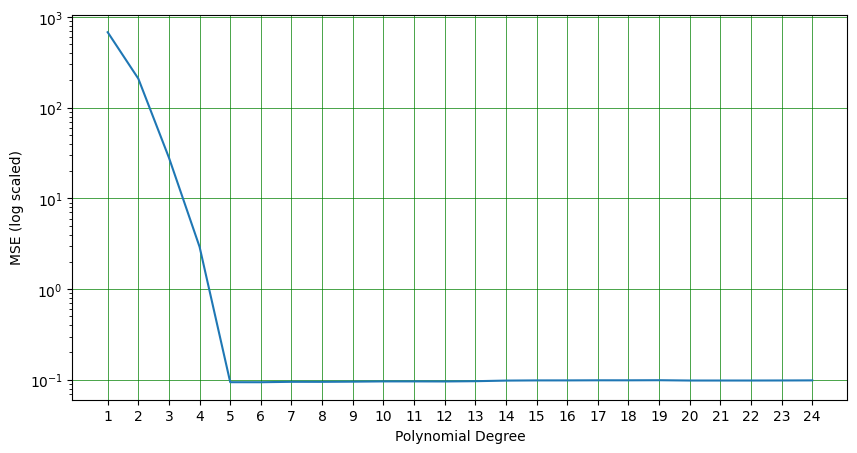

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/ai/main/uaa-SPLR.csv")
data.head()

X = data['intensity'].values
y = data['uaa']
X_test = data['ctr']
#print(x_data)
# Normalization
'''
x=(X-np.mean(X))/(np.std(X))
X_test=(X_test-np.mean(X_test))/(np.std(X_test))
'''
x=(X-np.min(X))/(np.max(X))
X_test=(X_test-np.min(X_test))/(np.max(X_test))

#transpose x and y
x = x.T
y = y.T
N=500
var = 10**-1
left = -1
right = 3
def p(x):
    return 6*x**5 - 2*x**4 +3 * x**2 + 2 * x + 1
xs = stats.uniform.rvs(left, right, size=N)
eps = stats.norm.rvs(0, np.sqrt(var), size=N)
ys = p(xs) + eps
left = int(np.min(x)-1)
right = int(np.max(x)+1)
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg

    def fit(self, x, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(x, N=self.deg + 1), y)

    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))

    @property
    def coef_(self):
        return self.model.coef_

known_degree_model = PolynomialRegression(deg=3)
known_degree_model.fit(xs, ys)
known_degree_model.coef_
overfit_model = PolynomialRegression(deg=N - 1)
overfit_model.fit(xs, ys)

fig = plt.figure()
ax = fig.add_subplot(111)

plot_xs = np.linspace(left, right, (right - left) * 100)

ax.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);


mean_squared_error(overfit_model.predict(x), y)

N_prediction = 128

prediction_xs = stats.uniform.rvs(left, right, size=N_prediction)
prediction_eps = stats.norm.rvs(0, np.sqrt(var), size=N_prediction)
prediction_ys = p(prediction_xs) + prediction_eps

mean_squared_error(overfit_model.predict(prediction_xs), prediction_ys)
#metrics.r2_score(cv_model.predict(prediction_xs), prediction_ys)

estimator = PolynomialRegression()
degrees = np.arange(1, 25)
cv_model = GridSearchCV(estimator,
                        cv=3,
                        param_grid={'deg': degrees},
                        scoring='neg_mean_squared_error')
cv_model.fit(xs, ys);

cv_model.best_params_, cv_model.best_estimator_.coef_

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
plt.plot(plot_xs, cv_model.predict(plot_xs), color='r', label='Cross-validated estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);
print(mean_squared_error(cv_model.predict(xs), ys))
import sklearn.metrics as metrics
print(metrics.r2_score(cv_model.predict(xs), ys))


print(mean_squared_error(cv_model.predict(prediction_xs), prediction_ys))
import sklearn.metrics as metrics
print(metrics.r2_score(cv_model.predict(prediction_xs), prediction_ys))

prediction_ys = np.char.mod('%f', prediction_ys)
prediction_ys = ",".join(prediction_ys)
print ("aa =[{0}];".format(prediction_ys))


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

cv_model.cv_results_

#scores = np.array([mean_test_score in cv_model.cv_results_])
scores= cv_model.cv_results_['mean_test_score']

ax.plot(degrees, -scores)
plt.xticks(np.arange(1, np.max(degrees)+1, step=1))
plt.grid(color='g', linestyle='-', linewidth=.5)
ax.set_yscale('log')
ax.set_ylabel('MSE (log scaled)')
ax.set_xlabel('Polynomial Degree')

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/ai/main/uaa-SPLR.csv")
data.head()

X = data[['intensity']].values
y_true=data[['uaa']].values

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X,y_true, epochs=35, batch_size=110,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
10/10 [==============================] - 1s 4ms/step - loss: 537180.7500 - accuracy: 0.0078
Epoch 2/35
10/10 [==============================] - 0s 3ms/step - loss: 64323.6797 - accuracy: 0.0078
Epoch 3/35
10/10 [==============================] - 0s 7ms/step - loss: 7149.0674 - accuracy: 0.0117
Epoch 4/35
10/